In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer


Scores: [2.06883485 2.64757655 2.83524478 2.33682691 2.0005373  2.58651714
 2.70404096 2.68630573 4.16673703 1.88555739]
Mean: 2.5918178649050287
Standard deviation: 0.612473210752094


In [413]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('../data/raw/auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)
#making a copy of the dataframe
data = df.copy()

In [414]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [416]:
# 6 null horse power values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [417]:
len(data)

398

In [418]:
# summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


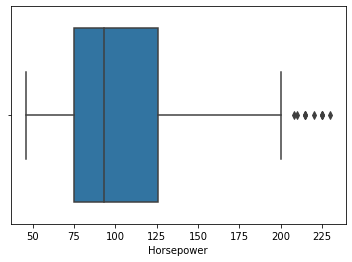

In [419]:
# looking at horsepower box plot
sns.boxplot(x=data['Horsepower'])

In [420]:
# imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [421]:
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

[Text(0, 0.5, 'no of cylinders'), Text(0.5, 0, 'count')]

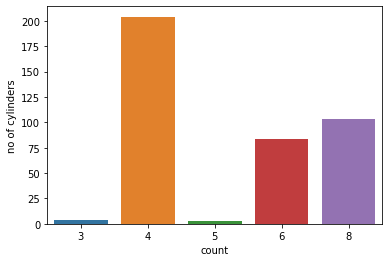

In [380]:
cyl_vals = data.Cylinders.value_counts()
ax = sns.barplot(x=cyl_vals.index,y = cyl_vals.values,data=data)
ax.set(xlabel='count', ylabel='no of cylinders')


In [381]:
# Category distribution
print(data["Cylinders"].value_counts() / len(data))

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64


In [382]:
print(data['Origin'].value_counts())

1    249
3     79
2     70
Name: Origin, dtype: int64


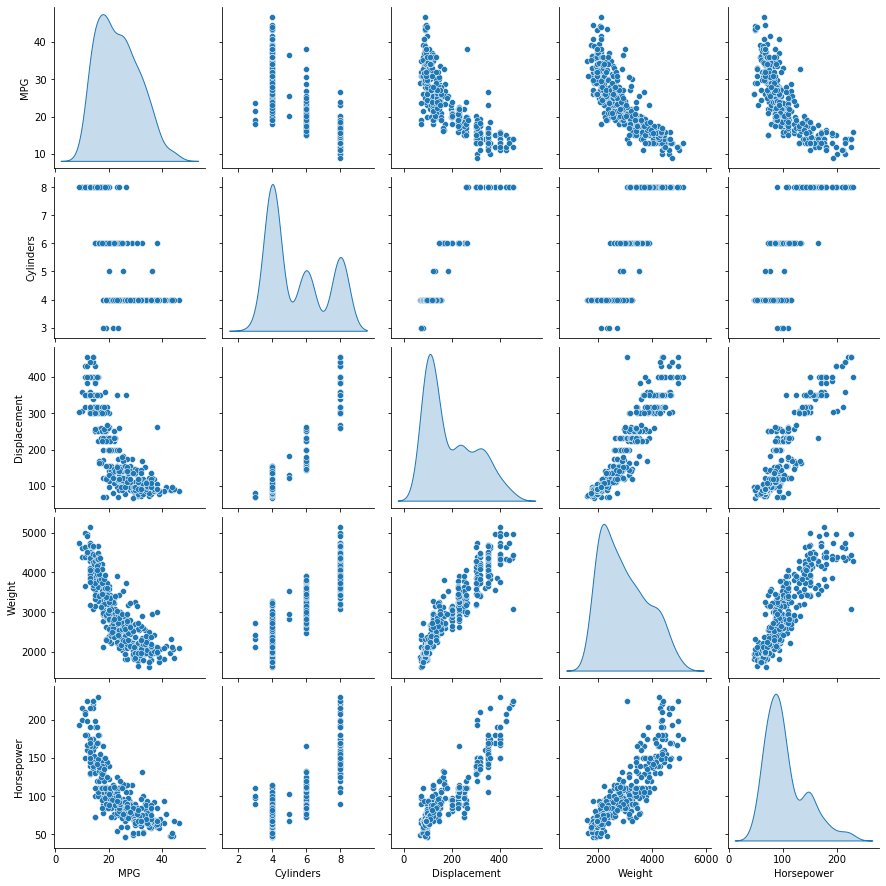

In [383]:
##pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

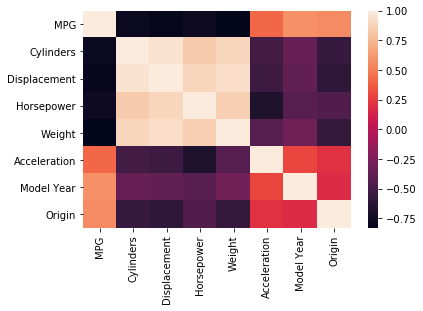

In [384]:
sns.heatmap(data.corr())

In [385]:
data_mat = data.corr()
data_mat.MPG.sort_values(ascending=False)

MPG             1.000000
Model Year      0.579267
Origin          0.563450
Acceleration    0.420289
Horsepower     -0.773453
Cylinders      -0.775396
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64

# Splitting data


In [386]:
# from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [387]:
print(len(strat_train_set),len(strat_test_set))

318 80


In [388]:
##checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [389]:
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)


4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [390]:
train_set = strat_train_set.copy()
##converting integer classes to countries in Origin 

train_set['Origin'] = train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
20,25.0,4,110.0,87.0,2672.0,17.5,70,USA
360,30.7,6,145.0,76.0,3160.0,19.6,81,USA
154,15.0,6,250.0,72.0,3432.0,21.0,75,India
122,24.0,4,121.0,110.0,2660.0,14.0,73,USA
224,15.0,8,302.0,130.0,4295.0,14.9,77,India
387,38.0,6,262.0,85.0,3015.0,17.0,82,India
288,18.2,8,318.0,135.0,3830.0,15.2,79,India
86,14.0,8,304.0,150.0,3672.0,11.5,73,India
79,26.0,4,96.0,69.0,2189.0,18.0,72,USA
89,15.0,8,318.0,150.0,3777.0,12.5,73,India


In [391]:
##one hot encoding origin variables
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [392]:
## testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

In [393]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [394]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,2.361538,438.000,0.092308,1.5000
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,2.121212,461.625,0.069697,1.4375
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,2.120000,429.500,0.073333,1.3750
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,2.026667,429.125,0.080000,1.5000
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,2.157143,431.125,0.075000,1.3125


# Pipeline

In [395]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

##custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x_data, y=None):
        return self  
    def transform(self, x_data):
        acc_on_cyl = x_data[:, acc_ix] / x_data[:, cyl_ix] 
        acc_on_power = x_data[:, acc_ix] / x_data[:, hpower_ix]    
        return np.c_[x_data, acc_on_power, acc_on_cyl] 
        # return np.c_[x_data] 
# pd.DataFrame(CustomAttrAdder().transform(data.values))
# attr_adder = CustomAttrAdder()
# data_tr_extra_attrs = attr_adder.transform(data.values)
# data_trdf=pd.DataFrame(data_tr_extra_attrs)
# data_trdf.head()



In [396]:
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2


In [397]:
features = strat_train_set.drop('MPG',axis=1)
features.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


In [398]:
labels = strat_train_set['MPG'].copy()
labels.head()

145    32.0
151    31.0
388    26.0
48     18.0
114    26.0
Name: MPG, dtype: float64

In [399]:
# data.head()

In [400]:
# corr_matrix_tr = data_trdf.corr()
# corr_matrix = data.corr()

In [401]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

In [402]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [403]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})    
    return df

In [404]:
train_df = features.copy()
preprocessed_df = preprocess_origin_cols(train_df)
prepared_data = pipeline_transformer(train_df)
train_df = pd.DataFrame(prepared_data)

# Modelling

In [405]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(prepared_data, labels)
sample_data = preprocess_origin_cols(features.iloc[:5])
sample_labels = labels.iloc[:5]
sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))
print('labels',list(sample_labels))

Prediction of samples:  [29.07706113 27.78221362 26.08507595 12.68921922 22.24811759]
labels [32.0, 31.0, 26.0, 18.0, 26.0]


C:\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [406]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.959955738276774

In [407]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [409]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_reg_rmse_scores)


Scores: [2.91745823 3.08393012 2.88698588 3.16450036 2.35       3.16272232
 3.76708608 3.7353882  4.21380221 2.70566908]
Mean: 3.1987542472281456
Standard deviation: 0.5288477429229893


In [410]:

scores = cross_val_score(lin_reg, 
                         prepared_data, 
                         labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_reg_rmse_scores)


Scores: [3.43029715 3.45041922 3.66364877 2.59538773 2.48739898 2.746598
 3.32560073 2.42211361 3.78139392 2.86493978]
Mean: 3.076779788960899
Standard deviation: 0.48259518534319396


In [422]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()


scores = cross_val_score(forest_reg, 
                         prepared_data, 
                         labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
forest_reg_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_reg_rmse_scores)


Scores: [2.15484551 2.54204909 2.76035436 2.50123484 1.93522086 2.50905957
 2.68928307 2.57962654 4.19251784 1.91827142]
Mean: 2.578246311143465
Standard deviation: 0.6075945681757904


# Hyper parameter tuning

In [423]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [424]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [425]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.4965205439091154 {'max_features': 2, 'n_estimators': 3}
2.9072016929459403 {'max_features': 2, 'n_estimators': 10}
2.8469892386755533 {'max_features': 2, 'n_estimators': 30}
3.0957945662488284 {'max_features': 4, 'n_estimators': 3}
2.892124379659242 {'max_features': 4, 'n_estimators': 10}
2.759991810478214 {'max_features': 4, 'n_estimators': 30}
3.033726268417206 {'max_features': 6, 'n_estimators': 3}
2.84018195514063 {'max_features': 6, 'n_estimators': 10}
2.7431108143792073 {'max_features': 6, 'n_estimators': 30}
2.9773901387843797 {'max_features': 8, 'n_estimators': 3}
2.7771539845734625 {'max_features': 8, 'n_estimators': 10}
2.697211389111681 {'max_features': 8, 'n_estimators': 30}
3.6937765366960944 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.02669404211869 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.2185917027922564 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8785693043453646 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [426]:
# feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.0024509783408770717),
 ('acc_on_cyl', 0.0011081535225787452),
 ('Weight', 0.01621481393573652),
 ('Origin', 0.05393315008965718),
 ('Model Year', 0.03065174967646719),
 ('MPG', 0.13841050834502783),
 ('Horsepower', 0.18856720734061197),
 ('Displacement', 0.11211147664400606),
 ('Cylinders', 0.3355388092232067),
 ('Acceleration', 0.12023444986373857)]

# Evaluating on the test set

In [428]:
##capturing the best configuration
final_model = grid_search.best_estimator_

##segregating the target variable from test set
X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

##preprocessing the test data origin column
X_test_preprocessed = preprocess_origin_cols(X_test)

##preparing the data with final transformation
X_test_prepared = pipeline_transformer(X_test_preprocessed)

##making final predictions
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.185980618271242